In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Save file path to variable
county_census = "Census_Data/ACS_17_5YR_Counties.csv"
countypop = "Census_Data/County Population.csv"
state_census = "Census_Data/ACS_17_5YR_State.csv"

In [3]:
# County Census for 2017 Population
countypop_df = pd.read_csv(countypop)
countypop_df.head()

,County,Total Population
0,"Allen County, Kansas",12519
1,"Anderson County, Kansas",7833
2,"Atchison County, Kansas",16332
3,"Barber County, Kansas",4586
4,"Barton County, Kansas",26476


In [4]:
# County Census for 2017 Education/Income Data
cty_data_df = pd.read_csv(county_census)
cty_data_df.head()

,County,25+Population,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS",...,Female Median Earning HS,Total Median Earning Assoc,Male Median Earning Assoc,Female Median Earning Assoc,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad
0,"Allen County, Kansas",1161,616,545,76,57,19,399,231,168,...,19715.0,28008,36058,22031.0,39116,47917.0,36612.0,52315.0,60159,47750
1,"Anderson County, Kansas",517,272,245,58,13,45,169,151,18,...,14167.0,25705,30167,22178.0,37083,37849.0,27361.0,40967.0,NaN,41321
2,"Atchison County, Kansas",2449,1188,1261,147,93,54,668,433,235,...,19472.0,24798,39074,18268.0,42221,67500.0,40654.0,49211.0,65234,43368
3,"Barber County, Kansas",319,163,156,98,65,33,86,51,35,...,15924.0,30550,47143,18750.0,40662,41250.0,40481.0,62159.0,75341,48824
4,"Barton County, Kansas",2287,1150,1137,344,190,154,685,372,313,...,20872.0,33825,42432,26941.0,41098,50278.0,33598.0,53445.0,55000,51394


In [5]:
# State Census for 2017 Education/Income Data
state_data_df = pd.read_csv(state_census)
state_data_df.head()

,Geography,25+Pop,Total Male Population,Total Female Population,"DNU: Total 18-24, Non-grad","DNU: M Total 18-24, Non-grad","DNU: F Total 18-24, Non-grad","DNU: Total 18-24, HS","DNU: M Total 18-24, HS","DNU: F Total 18-24, HS",...,Female Median Earning HS,Total Median Earning Assoc,Male Median Earning Assoc,Female Median Earning Assoc,Total Median Earning Bach,Male Median Earning Bach,Female Median Earning Bach,Total Median Earning Grad,Male Median Earning Grad,Female Median Earning Grad
0,Kansas,298805,156707,142098,35883,20799,15084,82269,48223,34046,...,22421,33770,41555,27341,47667,60730,39431,60053,75799,51031


In [6]:
# Total Kansas Population
kansas_pop = countypop_df[["Total Population"]].sum()
kansas_pop

Total Population    2913123
dtype: int64

In [7]:
cty_earning_df = pd.DataFrame(cty_data_df,columns = ["County", "Total Median Earnings ", 
                                         "Total Median Earning Less than HS", 
                                         "Total Median Earning HS",
                                         "Total Median Earning Assoc",
                                         "Total Median Earning Bach",
                                         "Total Median Earning Grad"])
cty_earning_df = pd.merge(cty_earning_df, countypop_df, on = "County")
cty_earning_df.head()

,County,Total Median Earnings,Total Median Earning Less than HS,Total Median Earning HS,Total Median Earning Assoc,Total Median Earning Bach,Total Median Earning Grad,Total Population
0,"Allen County, Kansas",30057,36705.0,26577,28008,39116,52315.0,12519
1,"Anderson County, Kansas",29803,42542.0,27277,25705,37083,40967.0,7833
2,"Atchison County, Kansas",33088,37206.0,29895,24798,42221,49211.0,16332
3,"Barber County, Kansas",31760,34625.0,26371,30550,40662,62159.0,4586
4,"Barton County, Kansas",33279,21538.0,26889,33825,41098,53445.0,26476


In [8]:
# Create a new DataFrame for counties with less than 100k population
small_cty_pop_df = cty_earning_df.loc[cty_earning_df["Total Population"] < 50000]

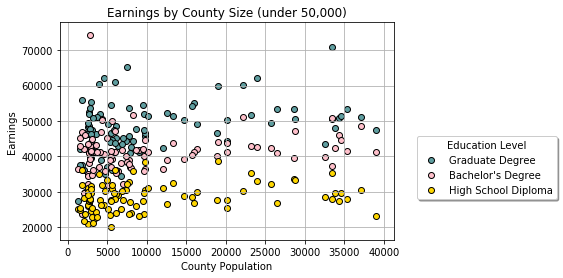

In [9]:
# Scatterplot for Earnings for Less than High School Graduate/Population by County
# Counties with populations under 50,000
plt.scatter(small_cty_pop_df["Total Population"], small_cty_pop_df["Total Median Earning Grad"],label = "Graduate Degree", marker="o", facecolors="cadetblue", edgecolors="black")
plt.scatter(small_cty_pop_df["Total Population"], small_cty_pop_df["Total Median Earning Bach"],label = "Bachelor's Degree", marker="o", facecolors="pink", edgecolors="black")
plt.scatter(small_cty_pop_df["Total Population"], small_cty_pop_df["Total Median Earning HS"],label = "High School Diploma", marker="o", facecolors="gold", edgecolors="black")

x_axis = np.arange(0, 50000, 2500)
y_axis = np.arange(0,50000,5000)

plt.legend(loc='upper right', title = "Education Level", bbox_to_anchor=(1.5, .5),
          ncol=1, fancybox=True, shadow=True)

plt.title("Earnings by County Size (under 50,000)")
plt.xlabel("County Population")
plt.ylabel("Earnings")
plt.grid()

plt.show()

In [10]:
# Create a new DataFrame for counties with less than 100k population
large_cty_pop_df = cty_earning_df.loc[cty_earning_df["Total Population"] > 50000]


<function matplotlib.pyplot.show(*args, **kw)>

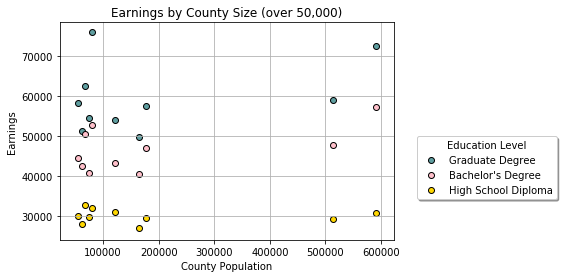

In [11]:
# Scatterplot for Earnings for Less than High School Graduate/Population by County
plt.scatter(large_cty_pop_df["Total Population"], large_cty_pop_df["Total Median Earning Grad"],label = "Graduate Degree", marker="o", facecolors="cadetblue", edgecolors="black")
plt.scatter(large_cty_pop_df["Total Population"], large_cty_pop_df["Total Median Earning Bach"],label = "Bachelor's Degree", marker="o", facecolors="pink", edgecolors="black")
plt.scatter(large_cty_pop_df["Total Population"], large_cty_pop_df["Total Median Earning HS"],label = "High School Diploma", marker="o", facecolors="gold", edgecolors="black")

x_axis = np.arange(0, 50000, 2500)
y_axis = np.arange(0,50000,5000)

plt.legend(loc='upper right', title = "Education Level", bbox_to_anchor=(1.5, .5),
          ncol=1, fancybox=True, shadow=True)

plt.title("Earnings by County Size (over 50,000)")
plt.xlabel("County Population")
plt.ylabel("Earnings")
plt.grid()

plt.show

In [12]:
earnings_df = cty_earning_df
earnings_df["HSVariance"] = cty_earning_df["Total Median Earning Bach"].subtract(cty_earning_df["Total Median Earning HS"], fill_value=0)
earnings_df["GradVariance"] = cty_earning_df["Total Median Earning Grad"].subtract(cty_earning_df["Total Median Earning Bach"], fill_value=0)

#Remove population over 50,000
# Create a new DataFrame for counties with less than 50k population
earnings_df = earnings_df.loc[earnings_df["Total Population"] < 50000]
earnings_df.head()

,County,Total Median Earnings,Total Median Earning Less than HS,Total Median Earning HS,Total Median Earning Assoc,Total Median Earning Bach,Total Median Earning Grad,Total Population,HSVariance,GradVariance
0,"Allen County, Kansas",30057,36705.0,26577,28008,39116,52315.0,12519,12539,13199.0
1,"Anderson County, Kansas",29803,42542.0,27277,25705,37083,40967.0,7833,9806,3884.0
2,"Atchison County, Kansas",33088,37206.0,29895,24798,42221,49211.0,16332,12326,6990.0
3,"Barber County, Kansas",31760,34625.0,26371,30550,40662,62159.0,4586,14291,21497.0
4,"Barton County, Kansas",33279,21538.0,26889,33825,41098,53445.0,26476,14209,12347.0


In [13]:
# Create differentials for HS to Bachelor's to Graduate degrees
diff_df = cty_earning_df
diff_df["HSVariance"] = diff_df["Total Median Earning Bach"].subtract(diff_df["Total Median Earning HS"], fill_value=0)
diff_df["GradVariance"] = diff_df["Total Median Earning Grad"].subtract(diff_df["Total Median Earning Bach"], fill_value=0)
hs_diff_df = diff_df.sort_values(['HSVariance'], ascending=[False])
grad_diff_df = diff_df.sort_values(['GradVariance'], ascending=[False])

<function matplotlib.pyplot.show(*args, **kw)>

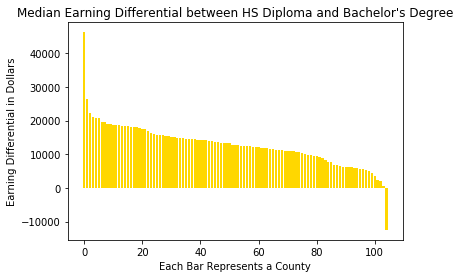

In [14]:
# Create chart for the Earning Differential between High School and Bachelor's Degree
hs_var = diff_df["Total Median Earning Bach"].subtract(diff_df["Total Median Earning HS"], fill_value=0)
hs_var = hs_var.sort_values(ascending=[False])
x_axis = np.arange(len(hs_var))
plt.bar(x_axis, hs_var, color='gold', alpha=1, align="center")
plt.title("Median Earning Differential between HS Diploma and Bachelor's Degree")
plt.ylabel("Earning Differential in Dollars")
plt.xlabel("Each Bar Represents a County")

plt.show       



<function matplotlib.pyplot.show(*args, **kw)>

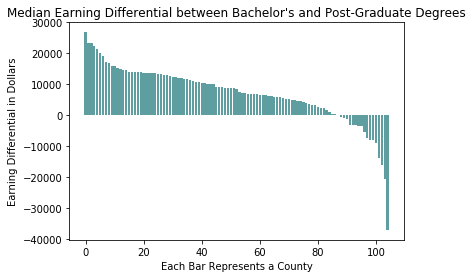

In [15]:
# Create chart for the Earning Differential between Bachelor's Degree and Graduate Degree.

grad_var = diff_df["Total Median Earning Grad"].subtract(diff_df["Total Median Earning Bach"], fill_value=0)
grad_var = grad_var.sort_values(ascending=[False])
x_axis = np.arange(len(grad_var))
plt.bar(x_axis, grad_var, color='cadetblue', alpha=1, align="center")
plt.title("Median Earning Differential between Bachelor's and Post-Graduate Degrees")
plt.ylabel("Earning Differential in Dollars")
plt.xlabel("Each Bar Represents a County")

plt.show         